* Mạng xã hội - IS353.M11
* Đồ án cuối kỳ
* Nguyễn Hoàng Nhân
* 18521176  


Các Chart hỗ trợ phân tích cụm được trực quan bằng Python cũng được đính kèm ở file này

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import centrality
from networkx.algorithms import link_analysis
from cdlib import algorithms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def generateBipartite(firstSeries, secondSeries, weight=1):
    B = nx.Graph()
    B.add_nodes_from(firstSeries, bipartite=0)
    B.add_nodes_from(secondSeries, bipartite=1)
    for source, target in zip(firstSeries, secondSeries):
        B.add_edge(source, target, weight=weight)
    return B

In [3]:
def plotBipartiteGraph(B, series, title, figsize=(12, 12), font_size=8, width=0.4):
    plt.figure(figsize=figsize)
    nx.draw_networkx(B,
                     pos=nx.drawing.layout.bipartite_layout(B, series),
                     font_size=font_size,
                     width=width)
    plt.title(title)
    plt.savefig(f"{title}.png")
    plt.show()

In [4]:
def generateWeightedProjectedGraph(B, series):
    return bipartite.weighted_projected_graph(B, series)

In [5]:
def plotWeightedProjectedGraph(G,
                               series,
                               title,
                               figsize=(12, 12),
                               node_size=150,
                               node_color="blue",
                               edge_color="#cccccc"):
    plt.figure(figsize=figsize)
    node_labels = dict(zip(series, series))
    layout = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,
                           pos=layout,
                           nodelist=series,
                           node_size=node_size,
                           node_color=node_color)
    nx.draw_networkx_edges(G, pos=layout, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos=layout, labels=node_labels)
    plt.axis("off")
    plt.title(title)
    plt.savefig(f"{title}.png")
    plt.show()

In [6]:
def plotCommunityDetection(G, communities, title, figsize=(12, 12)):
    plt.figure(figsize=(12, 12))
    palette = sns.color_palette(None, len(communities))
    layout = nx.spring_layout(G)
    color_map = []
    for node in G:
        for c in communities:
            if node in c:
                color_map.append(palette[communities.index(c)])
    nx.draw(G, node_color=color_map, with_labels=True, pos=layout)
    plt.title(title)
    plt.savefig(f"{title}.png")
    plt.show()

In [7]:
def communitiesDetail(communities):
    for i, c in enumerate(communities):
        print(f"Group {i}:")
        print(c)
        print(18 * "-")

# Dataset

Buying a diamond can be frustrating and expensive.

It inspired author to create this dataset of ~119K natural and lab-created diamonds from brilliantearth.com to demystify the value of the 4 Cs – cut, color, clarity, carat.



| Attribute    | Description                                                                           | Data Type          |
|--------------|---------------------------------------------------------------------------------------|--------------------|
| id           | Diamond identification number provided by Brilliant Earth                             | int                |
| url          | URL for the diamond details page                                                      | string             |
| shape        | External geometric appearance of a diamond                                            | string/categorical |
| price        | Price in U.S. dollars                                                                 | int                |
| carat        | Unit of measurement used to describe the weight of a diamond                          | float              |
| cut          | Facets, symmetry, and reflective qualities of a diamond                               | string/categorical |
| color        | Natural color or lack of color visible within a diamond, based on the GIA grade scale | string/categorical |
| clarity      | Visibility of natural microscopic inclusions and imperfections within a diamond       | string/categorical |
| report       | Diamond certificate or grading report provided by an independent gemology lab         | string             |
| type         | Natural or lab created diamonds                                                       | string             |
| date_fetched | Date the data was fetched                                                             | date               |

In [8]:
import pandas as pd

df = pd.read_csv("./diamonds_dataset.csv", encoding="utf-8")
# Remove unused columns
df.drop(["id", "url", "date_fetched"], axis=1, inplace=True)
df = df.round(1)
# Remove NaN rows
df.dropna(inplace=True)
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77045 entries, 0 to 119306
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   shape    77045 non-null  object 
 1   price    77045 non-null  int64  
 2   carat    77045 non-null  float64
 3   cut      77045 non-null  object 
 4   color    77045 non-null  object 
 5   clarity  77045 non-null  object 
 6   report   77045 non-null  object 
 7   type     77045 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.3+ MB
None


shape  price  carat        cut color clarity report     type
91519     Round   1700    1.0  Very Good     I    VVS2    IGI      lab
83627     Round    930    0.5      Ideal     E    VVS1    IGI      lab
49600     Round   2870    0.7  Very Good     E     VS2    GIA  natural
110063     Pear   4320    2.0      Ideal     I     SI1    IGI      lab
115287  Asscher   7320    2.1  Very Good     F     VS1   GCAL      lab

In [9]:
df.describe()

price         carat
count  7.704500e+04  77045.000000
mean   4.167978e+03      1.011375
std    1.118202e+04      0.726777
min    2.700000e+02      0.200000
25%    1.100000e+03      0.500000
50%    2.250000e+03      0.800000
75%    4.490000e+03      1.200000
max    1.348720e+06     15.300000

In [10]:
df.shape

(77045, 8)

In [11]:
df = df[["shape", "carat"]].drop_duplicates()
shapeSeries = df["shape"]
caratSeries = df["carat"]

print(f"Number of shapes: {len(shapeSeries.unique())}")
print(f"Number of carat: {len(caratSeries.unique())}")
print(f"Number of edges: {len(df)}")

Number of shapes: 10
Number of carat: 84
Number of edges: 471


# Bipartite Graph

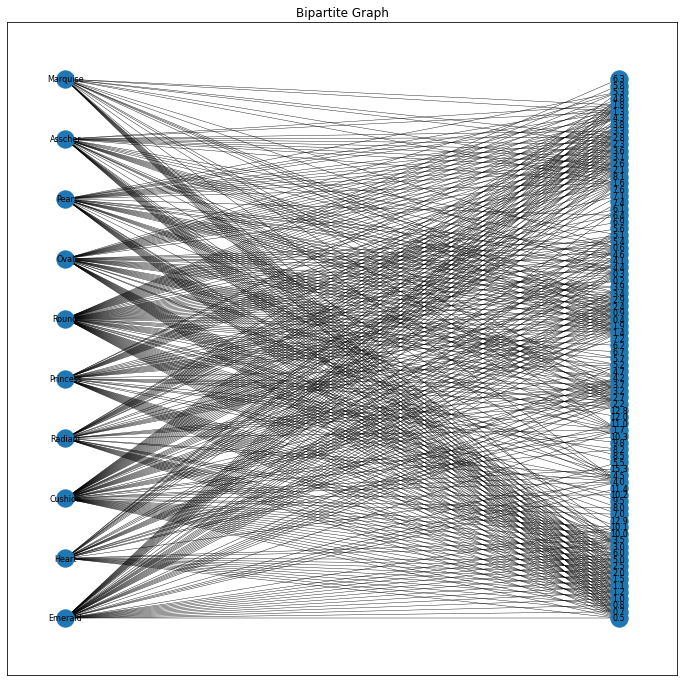

In [12]:
B = generateBipartite(caratSeries, shapeSeries)
plotBipartiteGraph(B, shapeSeries, "Bipartite Graph")

In [13]:
print(f"Number of edges: {B.number_of_edges()}")
print(f"Number of nodes: {B.number_of_nodes()}")

Number of edges: 471
Number of nodes: 94


# Weighted Projected Graph

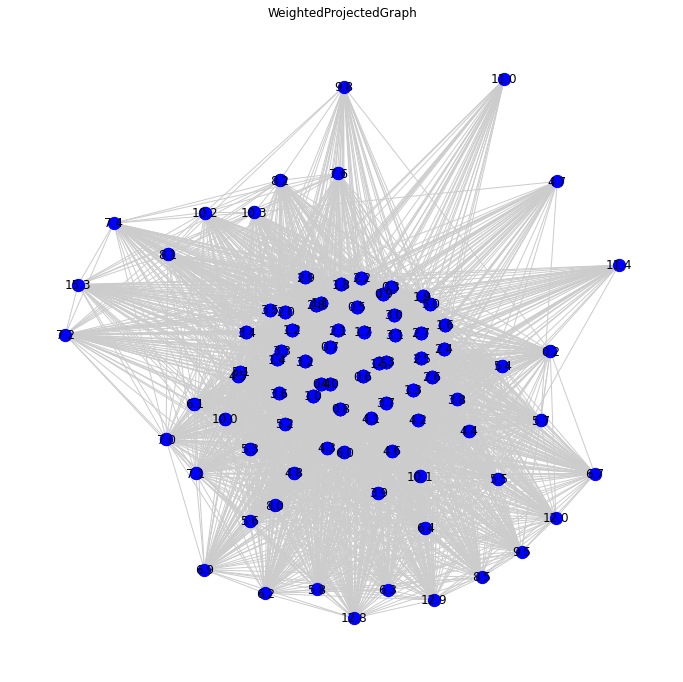

In [14]:
G = generateWeightedProjectedGraph(B, caratSeries)
plotWeightedProjectedGraph(G, caratSeries, "WeightedProjectedGraph")

In [15]:
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of nodes: {G.number_of_nodes()}")

Number of edges: 3214
Number of nodes: 84


# Archive Graph attributes to csv file

In [16]:
labels = nx.get_edge_attributes(G, "weight")
graph_attributes = pd.DataFrame(columns=["source", "target", "weight"])
for key, value in labels.items():
    graph_attributes = graph_attributes.append(
        {
            "source": key[0],
            "target": key[1],
            "weight": value
        },
        ignore_index=True)
graph_attributes.to_csv(r"graph_attributes.csv", index=False, header=True)

# NETWORK CENTRALITY

## Degree

In [17]:
pd.DataFrame(list(G.degree()),
             columns=["carat", "Degree"]).sort_values(["Degree", "carat"],
                                                      ascending=(False, True))

carat  Degree
0     0.3      83
1     0.4      83
3     0.5      83
4     0.6      83
5     0.7      83
..    ...     ...
83   15.3      62
71   11.4      53
73    4.7      51
65    9.8      45
81   11.0      35

[84 rows x 2 columns]

## Weighted Degree

In [18]:
pd.DataFrame(list(G.degree(weight="weight")),
             columns=["carat", "Weighted Degree"
                      ]).sort_values(["Weighted Degree", "carat"],
                                     ascending=(False, True))

carat  Weighted Degree
0     0.3              461
1     0.4              461
3     0.5              461
4     0.6              461
5     0.7              461
..    ...              ...
83   15.3               62
71   11.4               53
73    4.7               51
65    9.8               45
81   11.0               35

[84 rows x 2 columns]

## Betweenness Centrality

In [19]:
pd.DataFrame(list(
    centrality.betweenness_centrality(G,
                                      k=None,
                                      normalized=False,
                                      weight=None,
                                      endpoints=False,
                                      seed=None).items()),
             columns=["carat", "Betweenness Centrality"
                      ]).sort_values(["Betweenness Centrality", "carat"],
                                     ascending=(False, True))

carat  Betweenness Centrality
0     0.3                5.675848
1     0.4                5.675848
3     0.5                5.675848
4     0.6                5.675848
5     0.7                5.675848
..    ...                     ...
71   11.4                0.000000
70   12.0                0.000000
67   12.8                0.000000
62   12.9                0.000000
83   15.3                0.000000

[84 rows x 2 columns]

## Closeness Centrality

In [20]:
pd.DataFrame(list(
    centrality.closeness_centrality(G, u=None, distance=None,
                                    wf_improved=True).items()),
             columns=["carat", "Closeness Centrality"
                      ]).sort_values(["Closeness Centrality", "carat"],
                                     ascending=(False, True))

carat  Closeness Centrality
0     0.3              1.000000
1     0.4              1.000000
3     0.5              1.000000
4     0.6              1.000000
5     0.7              1.000000
..    ...                   ...
83   15.3              0.798077
71   11.4              0.734513
73    4.7              0.721739
65    9.8              0.685950
81   11.0              0.633588

[84 rows x 2 columns]

## Harmonic Closeness Centrality

In [21]:
max_value = max(
    centrality.harmonic_centrality(G, nbunch=None, distance=None,
                                   sources=None).values())

pd.DataFrame(list({
    k: v / max_value
    for k, v in centrality.harmonic_centrality(
        G, nbunch=None, distance=None, sources=None).items()
}.items()),
    columns=["carat", "Harmonic Closeness Centrality"]).sort_values(
    ["Harmonic Closeness Centrality", "carat"],
    ascending=(False, True))

carat  Harmonic Closeness Centrality
70    0.3                       1.000000
51    0.4                       1.000000
0     0.5                       1.000000
52    0.6                       1.000000
1     0.7                       1.000000
..    ...                            ...
23   15.3                       0.873494
20   11.4                       0.819277
64    4.7                       0.807229
55    9.8                       0.771084
26   11.0                       0.710843

[84 rows x 2 columns]

## Eigenvector Centrality

In [22]:
max_value = max(
    centrality.eigenvector_centrality(G,
                                      max_iter=100,
                                      tol=1e-06,
                                      nstart=None,
                                      weight=None).values())

pd.DataFrame(list({
    k: v / max_value
    for k, v in centrality.eigenvector_centrality(
        G, max_iter=100, tol=1e-06, nstart=None, weight=None).items()
}.items()),
    columns=["carat", "Eigenvector Centrality"
             ]).sort_values(["Eigenvector Centrality", "carat"],
                            ascending=(False, True))

carat  Eigenvector Centrality
0     0.3                1.000000
1     0.4                1.000000
3     0.5                1.000000
4     0.6                1.000000
5     0.7                1.000000
..    ...                     ...
83   15.3                0.775977
71   11.4                0.676227
73    4.7                0.650001
65    9.8                0.570584
81   11.0                0.451072

[84 rows x 2 columns]

## PageRank

In [23]:
pd.DataFrame(list(
    link_analysis.pagerank_alg.pagerank(G,
                                        alpha=0.85,
                                        personalization=None,
                                        max_iter=100,
                                        tol=1e-06,
                                        nstart=None,
                                        weight='weight',
                                        dangling=None).items()),
             columns=["carat",
                      "PageRank"]).sort_values(["PageRank", "carat"],
                                               ascending=(False, True))

carat  PageRank
0     0.3  0.018404
1     0.4  0.018404
3     0.5  0.018404
4     0.6  0.018404
5     0.7  0.018404
..    ...       ...
83   15.3  0.004080
71   11.4  0.003661
73    4.7  0.003584
65    9.8  0.003373
81   11.0  0.002980

[84 rows x 2 columns]

# Community Detection

## Louvain Algorithm

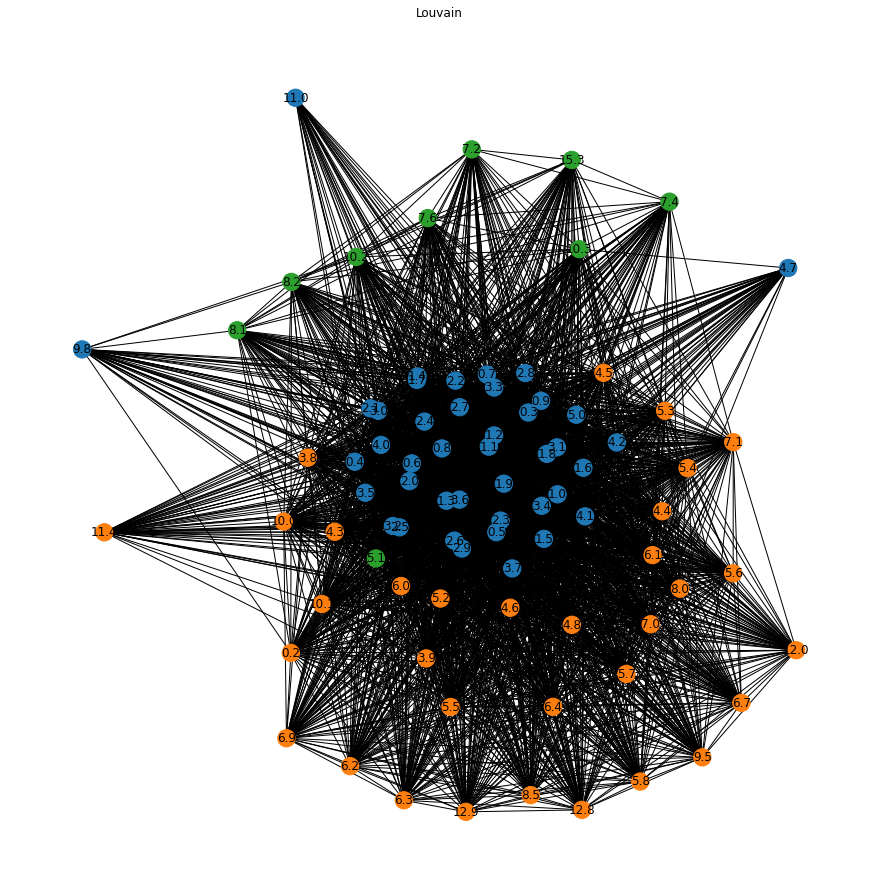

In [24]:
communities = algorithms.louvain(G).communities
plotCommunityDetection(G, communities, title="Louvain", figsize=(12, 12))

In [25]:
communitiesDetail(communities)

Group 0:
[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 1.8, 2.0, 2.2, 2.1, 2.6, 2.3, 2.5, 2.4, 2.7, 2.8, 3.0, 2.9, 3.1, 3.5, 4.0, 3.2, 3.4, 4.2, 3.3, 4.1, 3.6, 3.7, 5.0, 9.8, 4.7, 11.0]
------------------
Group 1:
[0.2, 3.9, 4.4, 5.3, 3.8, 5.4, 4.6, 5.5, 4.5, 5.2, 4.3, 4.8, 6.0, 8.0, 6.9, 10.0, 7.0, 10.1, 7.1, 5.6, 9.5, 12.9, 6.1, 8.5, 12.8, 6.3, 12.0, 11.4, 6.7, 5.7, 6.4, 5.8, 6.2]
------------------
Group 2:
[5.1, 8.1, 8.2, 10.2, 7.6, 7.4, 7.2, 10.3, 15.3]
------------------


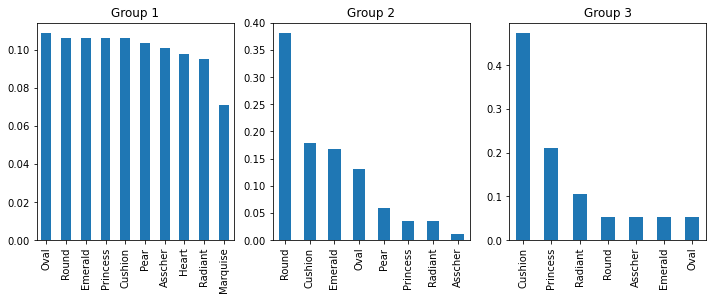

In [26]:
COL = 3
ROW = 1
plt.figure(figsize=(12, 4))
plt.subplot(ROW, COL, 1)
df[df["carat"].isin(
    communities[0])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 1")
plt.subplot(ROW, COL, 2)
df[df["carat"].isin(
    communities[1])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 2")
plt.subplot(ROW, COL, 3)
df[df["carat"].isin(
    communities[2])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 3")
plt.show()

## Girvan–Newman

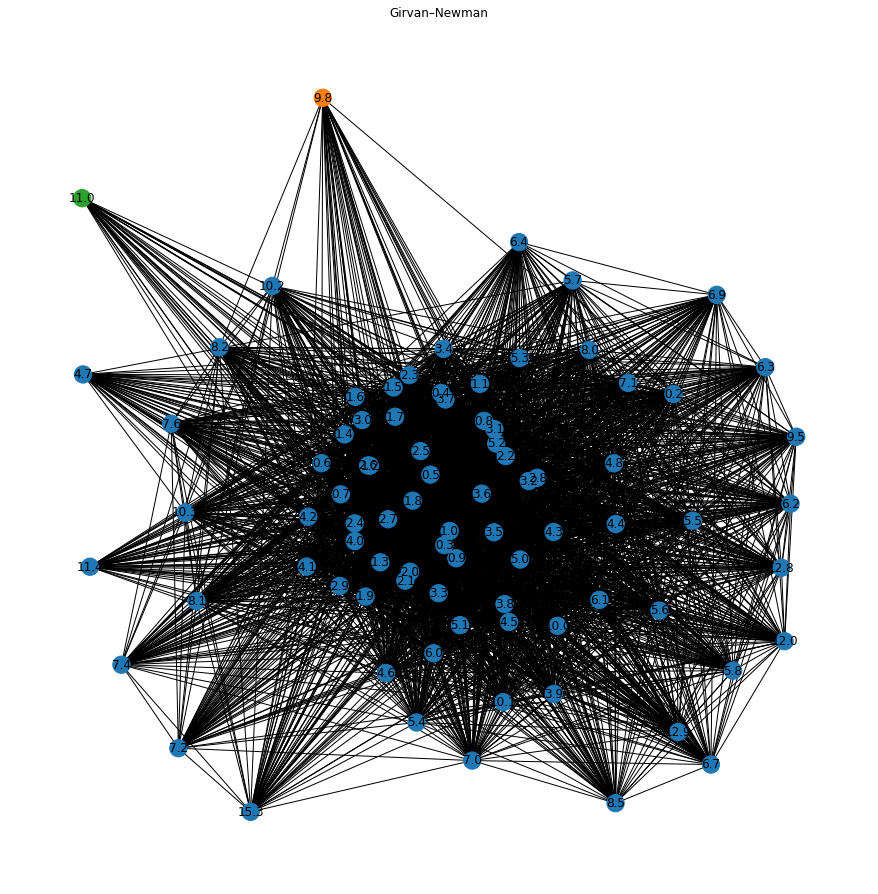

In [27]:
communities = algorithms.girvan_newman(G, level=2).communities
plotCommunityDetection(G, communities, title="Girvan–Newman", figsize=(12, 12))

In [28]:
communitiesDetail(communities)

Group 0:
[0.5, 0.8, 1.1, 0.7, 1.0, 1.2, 1.3, 1.5, 2.0, 2.5, 5.2, 6.0, 10.1, 11.4, 8.0, 10.0, 3.0, 3.5, 12.9, 15.3, 12.0, 4.0, 4.5, 5.0, 5.5, 7.0, 8.5, 9.5, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 0.2, 4.4, 5.4, 6.9, 6.4, 7.4, 2.3, 2.8, 3.3, 3.8, 4.3, 1.8, 4.8, 5.3, 5.8, 6.3, 0.6, 0.4, 0.9, 8.2, 10.2, 10.3, 1.7, 12.8, 2.7, 2.2, 3.2, 3.7, 4.2, 4.7, 5.7, 6.7, 6.2, 7.2, 0.3, 4.1, 4.6, 5.1, 5.6, 6.1, 7.1, 7.6, 1.6, 8.1, 2.6, 2.1, 3.1, 3.6]
------------------
Group 1:
[9.8]
------------------
Group 2:
[11.0]
------------------


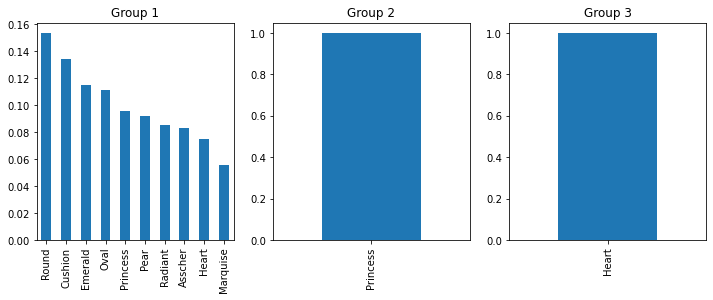

In [29]:
COL = 3
ROW = 1
plt.figure(figsize=(12, 4))
plt.subplot(ROW, COL, 1)
df[df["carat"].isin(
    communities[0])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 1")
plt.subplot(ROW, COL, 2)
df[df["carat"].isin(
    communities[1])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 2")
plt.subplot(ROW, COL, 3)
df[df["carat"].isin(
    communities[2])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 3")
plt.show()

## Fluid Communities

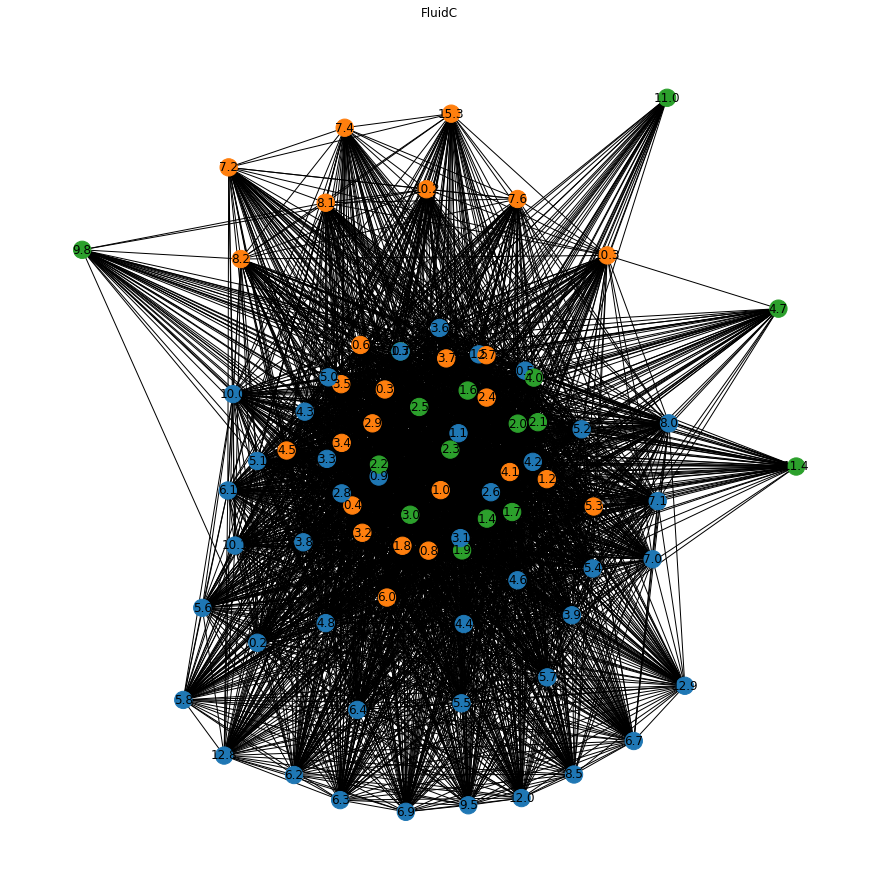

In [30]:
communities = algorithms.async_fluid(G, k=3).communities
plotCommunityDetection(G, communities, title="FluidC", figsize=(12, 12))

In [31]:
communitiesDetail(communities)

Group 0:
[0.2, 1.5, 1.3, 3.1, 4.6, 5.4, 6.1, 6.3, 6.7, 3.3, 10.0, 5.6, 3.8, 12.0, 12.8, 8.0, 10.1, 12.9, 9.5, 4.4, 5.5, 5.0, 5.1, 6.9, 6.4, 0.5, 7.1, 7.0, 1.1, 8.5, 2.6, 3.6, 2.8, 4.2, 4.8, 4.3, 5.8, 5.7, 5.2, 6.2, 0.9, 3.9]
------------------
Group 1:
[0.6, 0.4, 2.9, 3.7, 1.8, 4.5, 2.7, 7.6, 8.1, 8.2, 1.0, 10.3, 4.1, 5.3, 10.2, 7.4, 3.5, 15.3, 6.0, 1.2, 0.3, 3.2, 0.8, 7.2, 2.4, 3.4]
------------------
Group 2:
[0.7, 1.9, 2.3, 2.5, 4.0, 2.0, 2.1, 3.0, 1.4, 9.8, 2.2, 11.4, 11.0, 1.6, 4.7, 1.7]
------------------


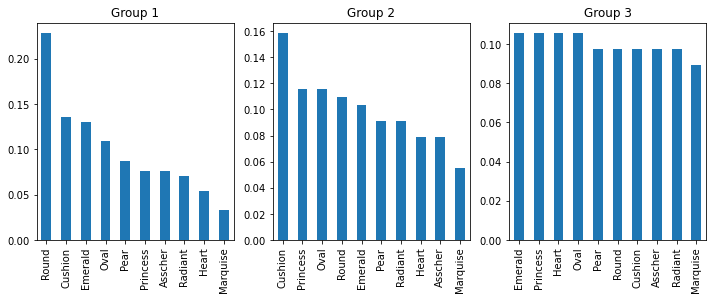

In [32]:
COL = 3
ROW = 1
plt.figure(figsize=(12, 4))
plt.subplot(ROW, COL, 1)
df[df["carat"].isin(
    communities[0])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 1")
plt.subplot(ROW, COL, 2)
df[df["carat"].isin(
    communities[1])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 2")
plt.subplot(ROW, COL, 3)
df[df["carat"].isin(
    communities[2])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 3")
plt.show()

## CNM

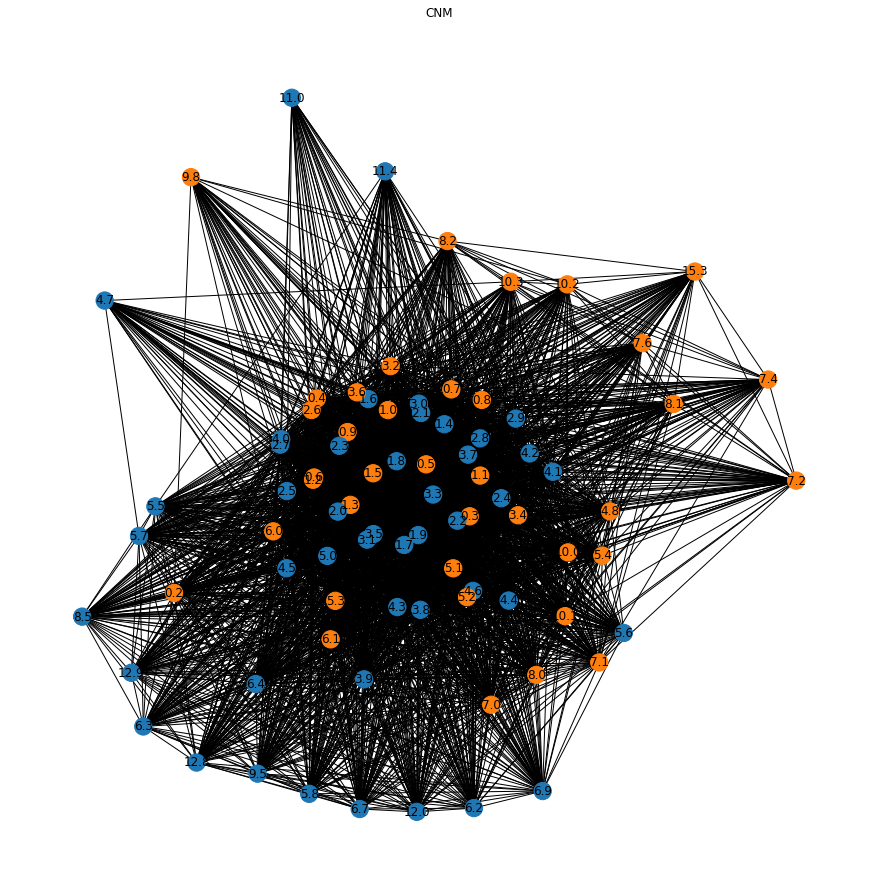

In [33]:
communities = algorithms.greedy_modularity(G).communities
plotCommunityDetection(G, communities, title="CNM", figsize=(12, 12))

In [34]:
communitiesDetail(communities)

Group 0:
[1.4, 1.9, 3.7, 4.1, 5.0, 4.0, 3.5, 3.3, 3.1, 2.9, 4.2, 3.0, 2.5, 11.0, 2.0, 8.5, 9.5, 11.4, 12.0, 12.8, 12.9, 4.6, 4.5, 4.4, 5.6, 5.5, 6.9, 6.4, 1.6, 2.1, 1.7, 2.8, 2.7, 2.3, 2.2, 3.8, 4.3, 1.8, 4.7, 5.8, 5.7, 6.7, 6.3, 6.2, 2.4, 3.9]
------------------
Group 1:
[0.9, 1.5, 1.3, 1.2, 1.1, 1.0, 0.8, 0.7, 4.8, 5.4, 6.1, 5.3, 0.5, 10.1, 7.1, 8.0, 7.0, 10.0, 10.3, 10.2, 15.3, 0.6, 5.1, 6.0, 7.6, 7.4, 8.2, 8.1, 2.6, 9.8, 3.6, 0.2, 0.3, 3.2, 5.2, 7.2, 0.4, 3.4]
------------------


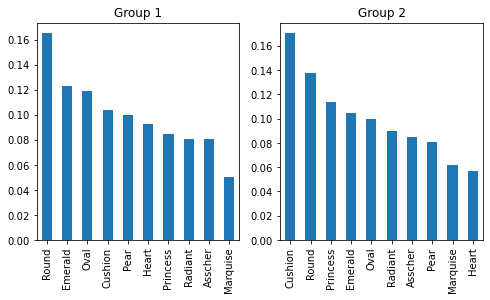

In [35]:
COL = 2
ROW = 1
plt.figure(figsize=(8, 4))
plt.subplot(ROW, COL, 1)
df[df["carat"].isin(
    communities[0])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 1")
plt.subplot(ROW, COL, 2)
df[df["carat"].isin(
    communities[1])]["shape"].value_counts(normalize=True).plot.bar()
plt.title("Group 2")
plt.show()

# Other

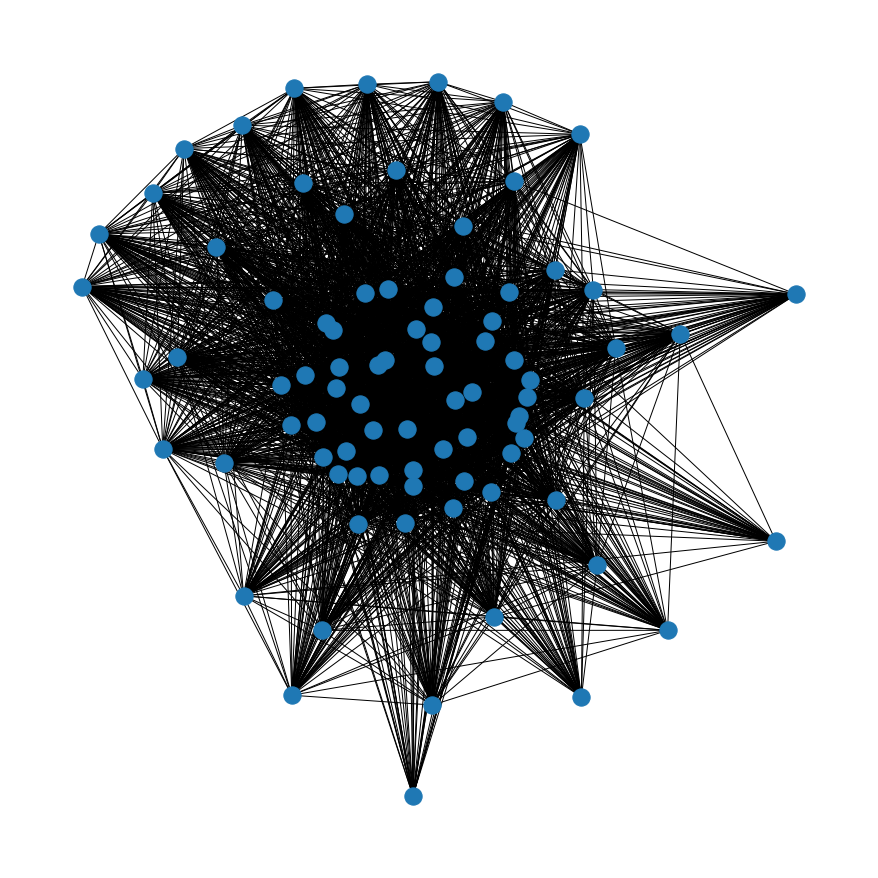

In [36]:
cliques = nx.find_cliques(G)
cliques10 = [clq for clq in cliques if len(clq) >= 10]
nodes = set(n for clq in cliques10 for n in clq)
h = G.subgraph(nodes)
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 10]
k = h.subgraph(nodes)

plt.figure(figsize=(12, 12))
nx.draw(k)

In [37]:
print(f"Number of edges: {k.number_of_edges()}")
print(f"Number of nodes: {k.number_of_nodes()}")

Number of edges: 3214
Number of nodes: 84
